## Loan Application Status Prediction
- Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [149]:
#Loading Dataset
df = pd.read_csv(r'E:\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
#Checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [151]:
#Shape of our dataset
df.shape

(614, 13)

In [152]:
#Checking for null/Nan values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Since there are missing values present in our data set so,first we need to treat them

In [153]:
#Let's check coloumns value counts and uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))

Loan_ID : 614
Gender : 3
Married : 3
Dependents : 5
Education : 2
Self_Employed : 3
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 204
Loan_Amount_Term : 11
Credit_History : 3
Property_Area : 3
Loan_Status : 2


In [154]:
#Treating missing values in data set:

df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean())
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [155]:
df.isna().sum()

#Hence, our dataset is good to go for next steps.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualisation

Loan_Status
Y    422
N    192
dtype: int64


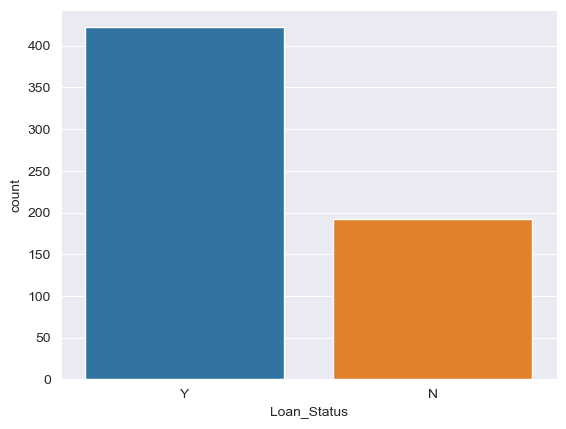

In [156]:
sns.countplot('Loan_Status',data=df)
print(df.value_counts('Loan_Status'))

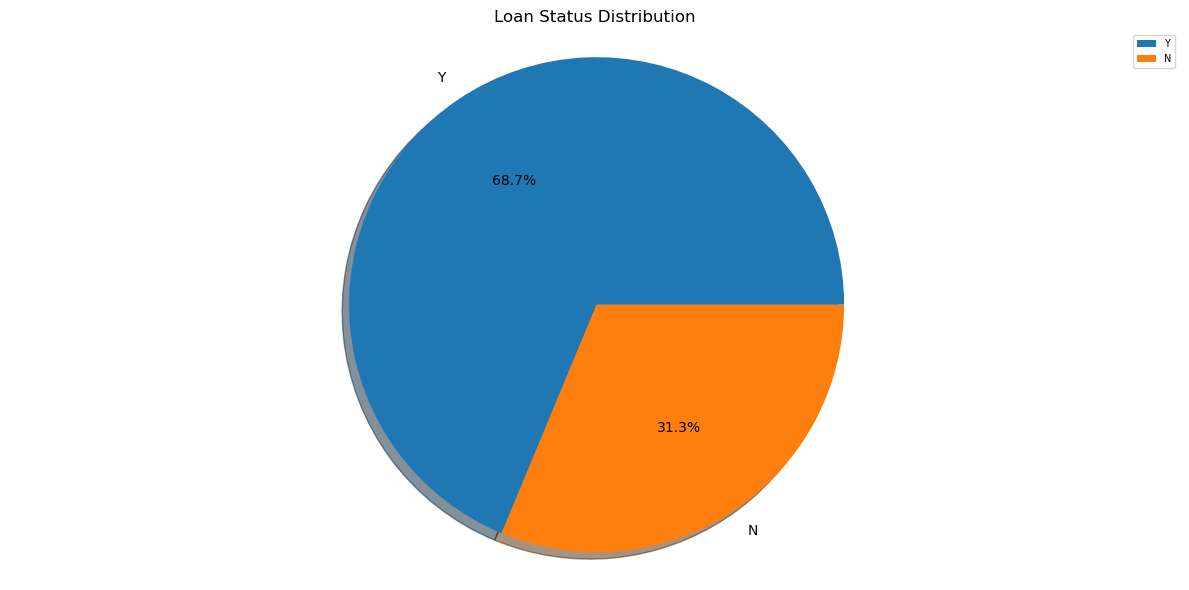

In [157]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df['Loan_Status'].value_counts(),labels=df['Loan_Status'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

Gender
Male      502
Female    112
dtype: int64


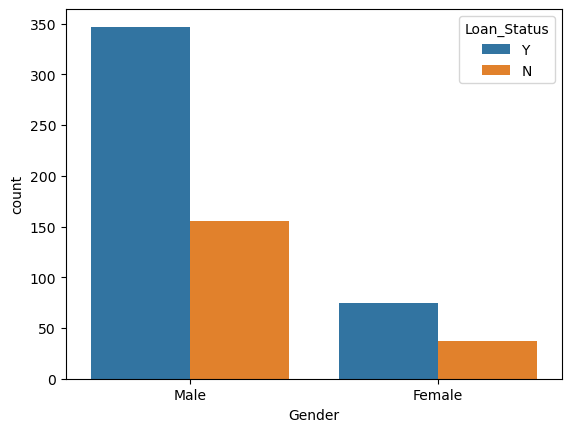

In [158]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
print(df.value_counts('Gender'))

Married
Yes    401
No     213
dtype: int64


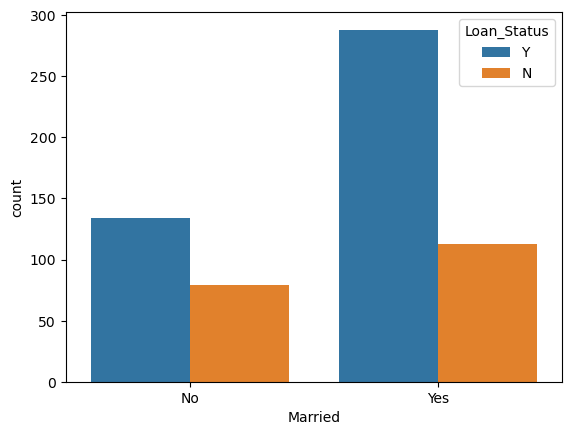

In [159]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
print(df.value_counts('Married'))

Dependents
0     360
1     102
2     101
3+     51
dtype: int64


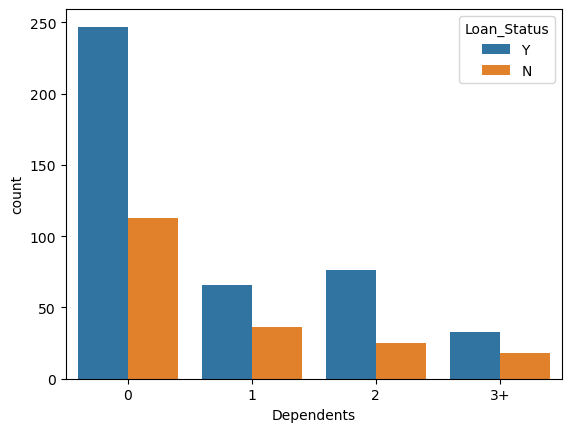

In [160]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
print(df.value_counts('Dependents'))

Education
Graduate        480
Not Graduate    134
dtype: int64


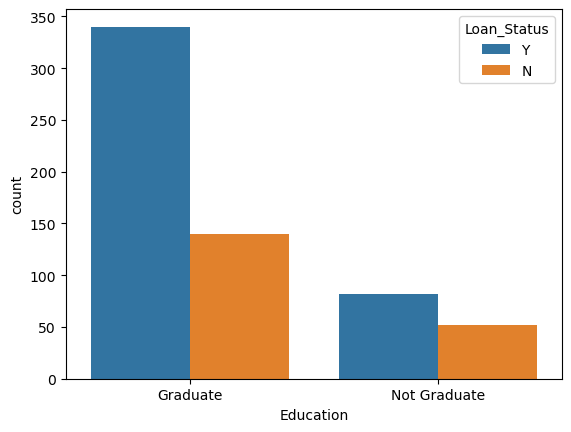

In [161]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
print(df.value_counts('Education'))

Self_Employed
No     532
Yes     82
dtype: int64


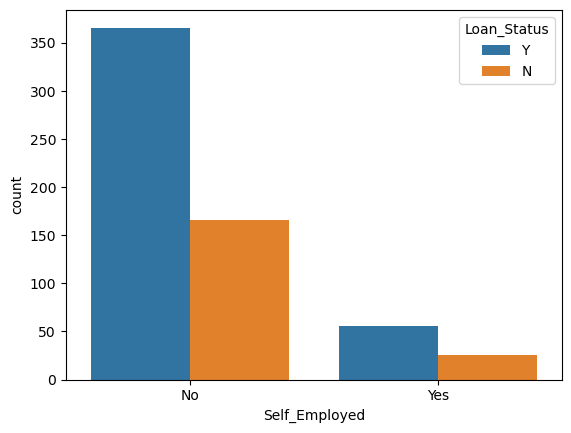

In [162]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
print(df.value_counts('Self_Employed'))

MEAN COAPPLICANT INCOME :  1621.245798027101


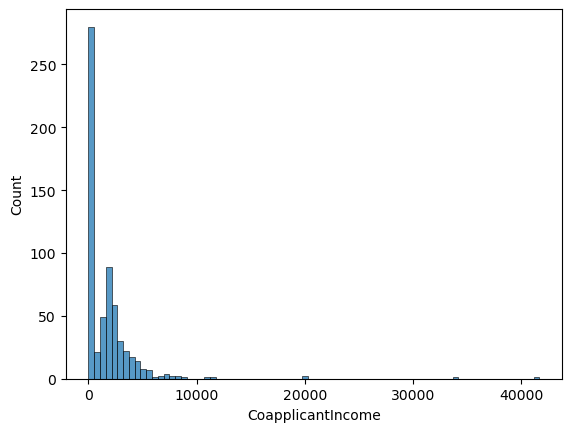

In [163]:
sns.histplot(x='CoapplicantIncome',data=df)
print('MEAN COAPPLICANT INCOME : ', df['CoapplicantIncome'].mean())

MEAN APPLICANT INCOME :  5403.459283387622


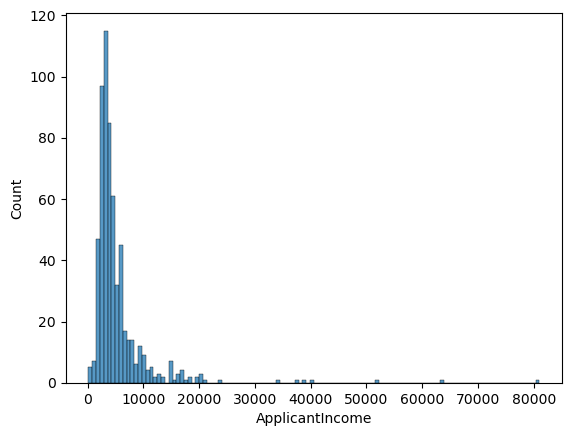

In [164]:
sns.histplot(x='ApplicantIncome',data=df)
print('MEAN APPLICANT INCOME : ', df['ApplicantIncome'].mean())

Credit_History
1.0    525
0.0     89
dtype: int64


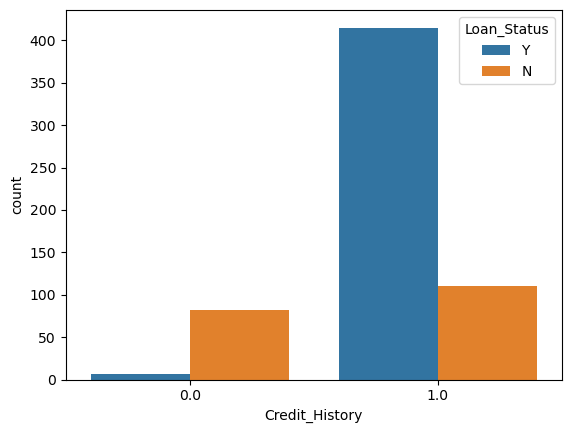

In [165]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
print(df.value_counts('Credit_History'))

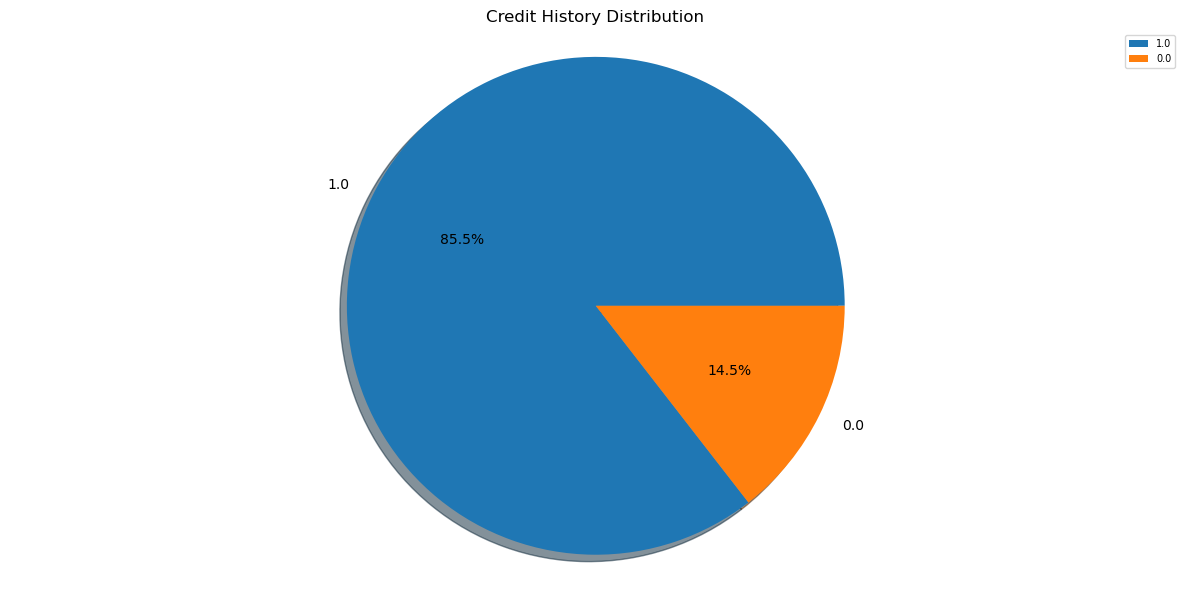

In [166]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df['Credit_History'].value_counts(),labels=df['Credit_History'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Credit History Distribution')
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
dtype: int64


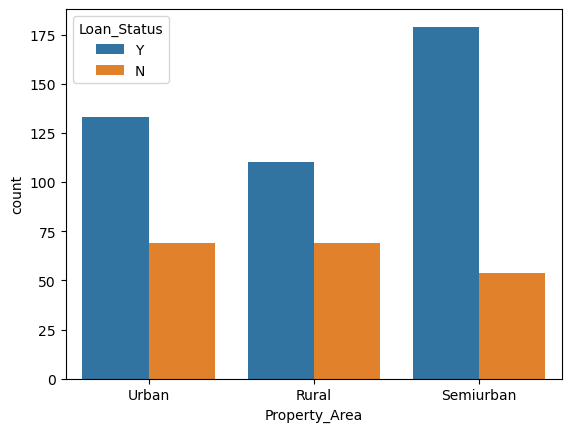

In [167]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
print(df.value_counts('Property_Area'))

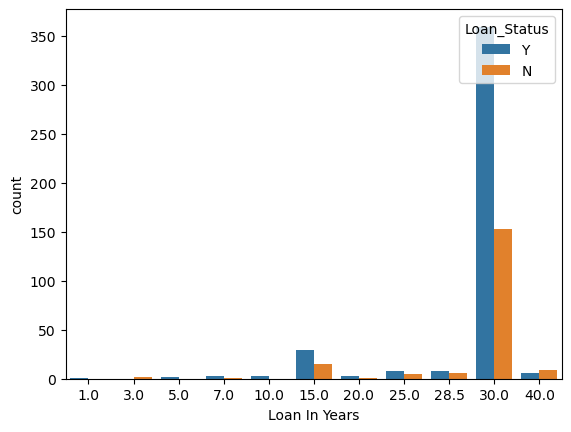

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
dtype: int64

In [168]:
#Loan Amount

sns.countplot(df.Loan_Amount_Term/12,hue=df.Loan_Status)
plt.xlabel('Loan In Years')
plt.show()
df.value_counts('Loan_Amount_Term')

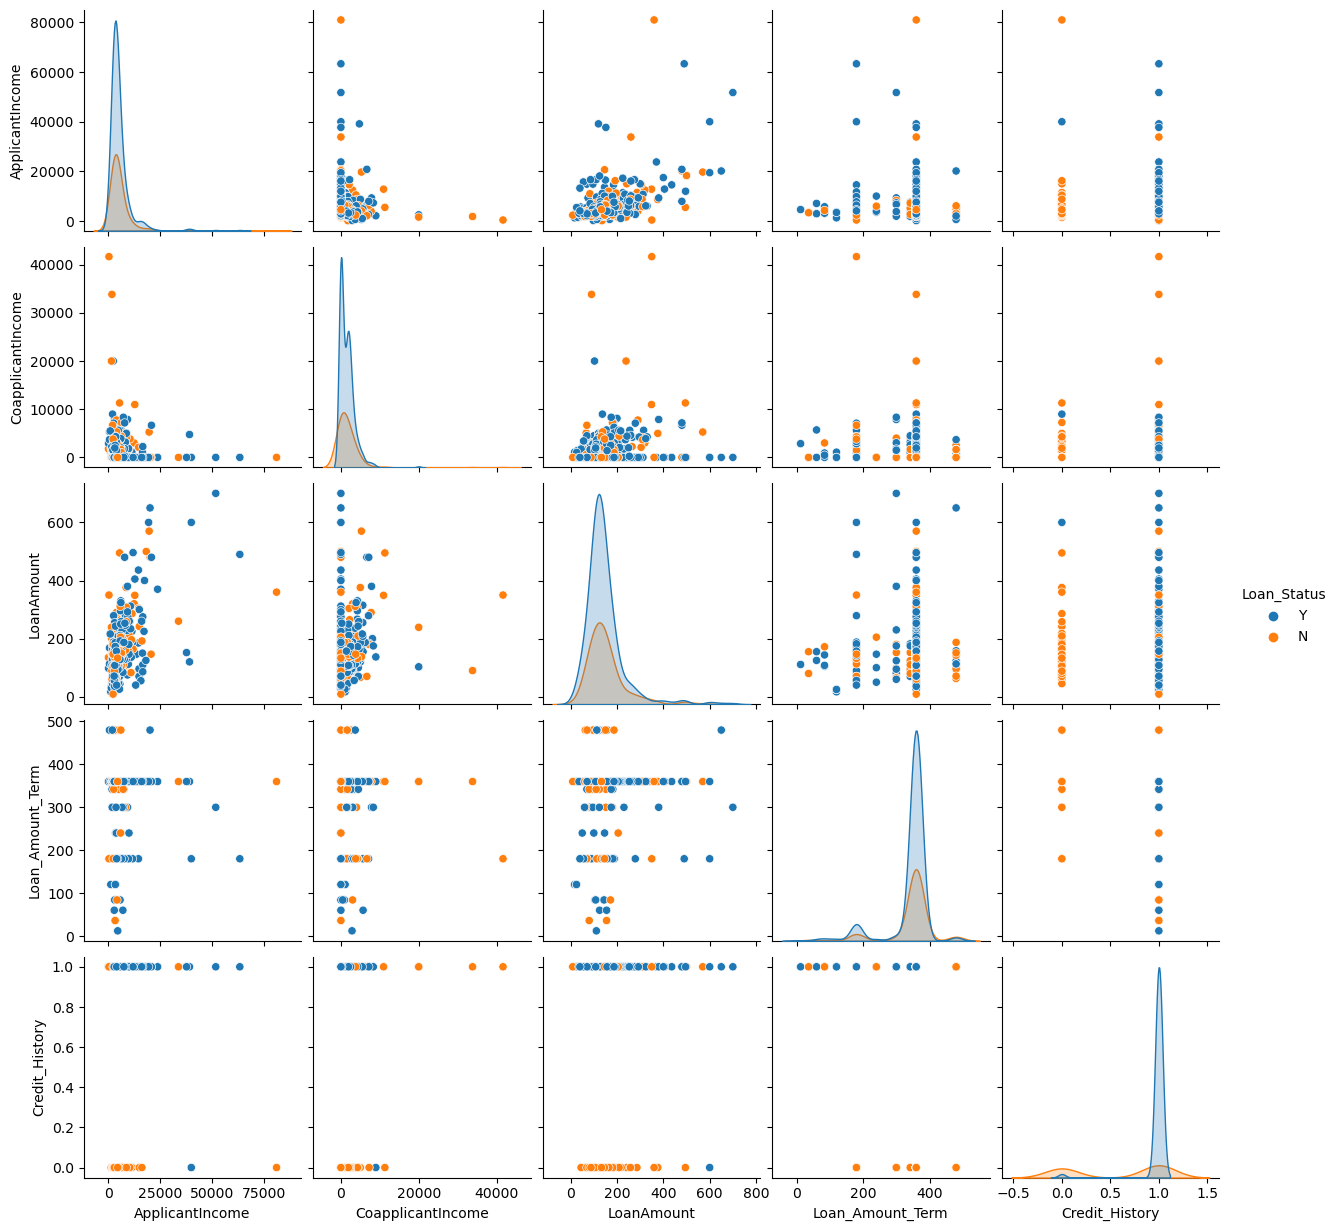

In [169]:
#Plotting Pair Plot
sns.pairplot(df,hue='Loan_Status',diag_kind='kde')

In [170]:
#Dropping Coloumn "Loan_Id" as it has nothing informative for our Analysis
df1=df.drop(columns=['Loan_ID'],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [171]:
#Encoding object data into integer

label_col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df1[label_col]=df1[label_col].apply(lambda x : label.fit_transform(x))

In [172]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [185]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


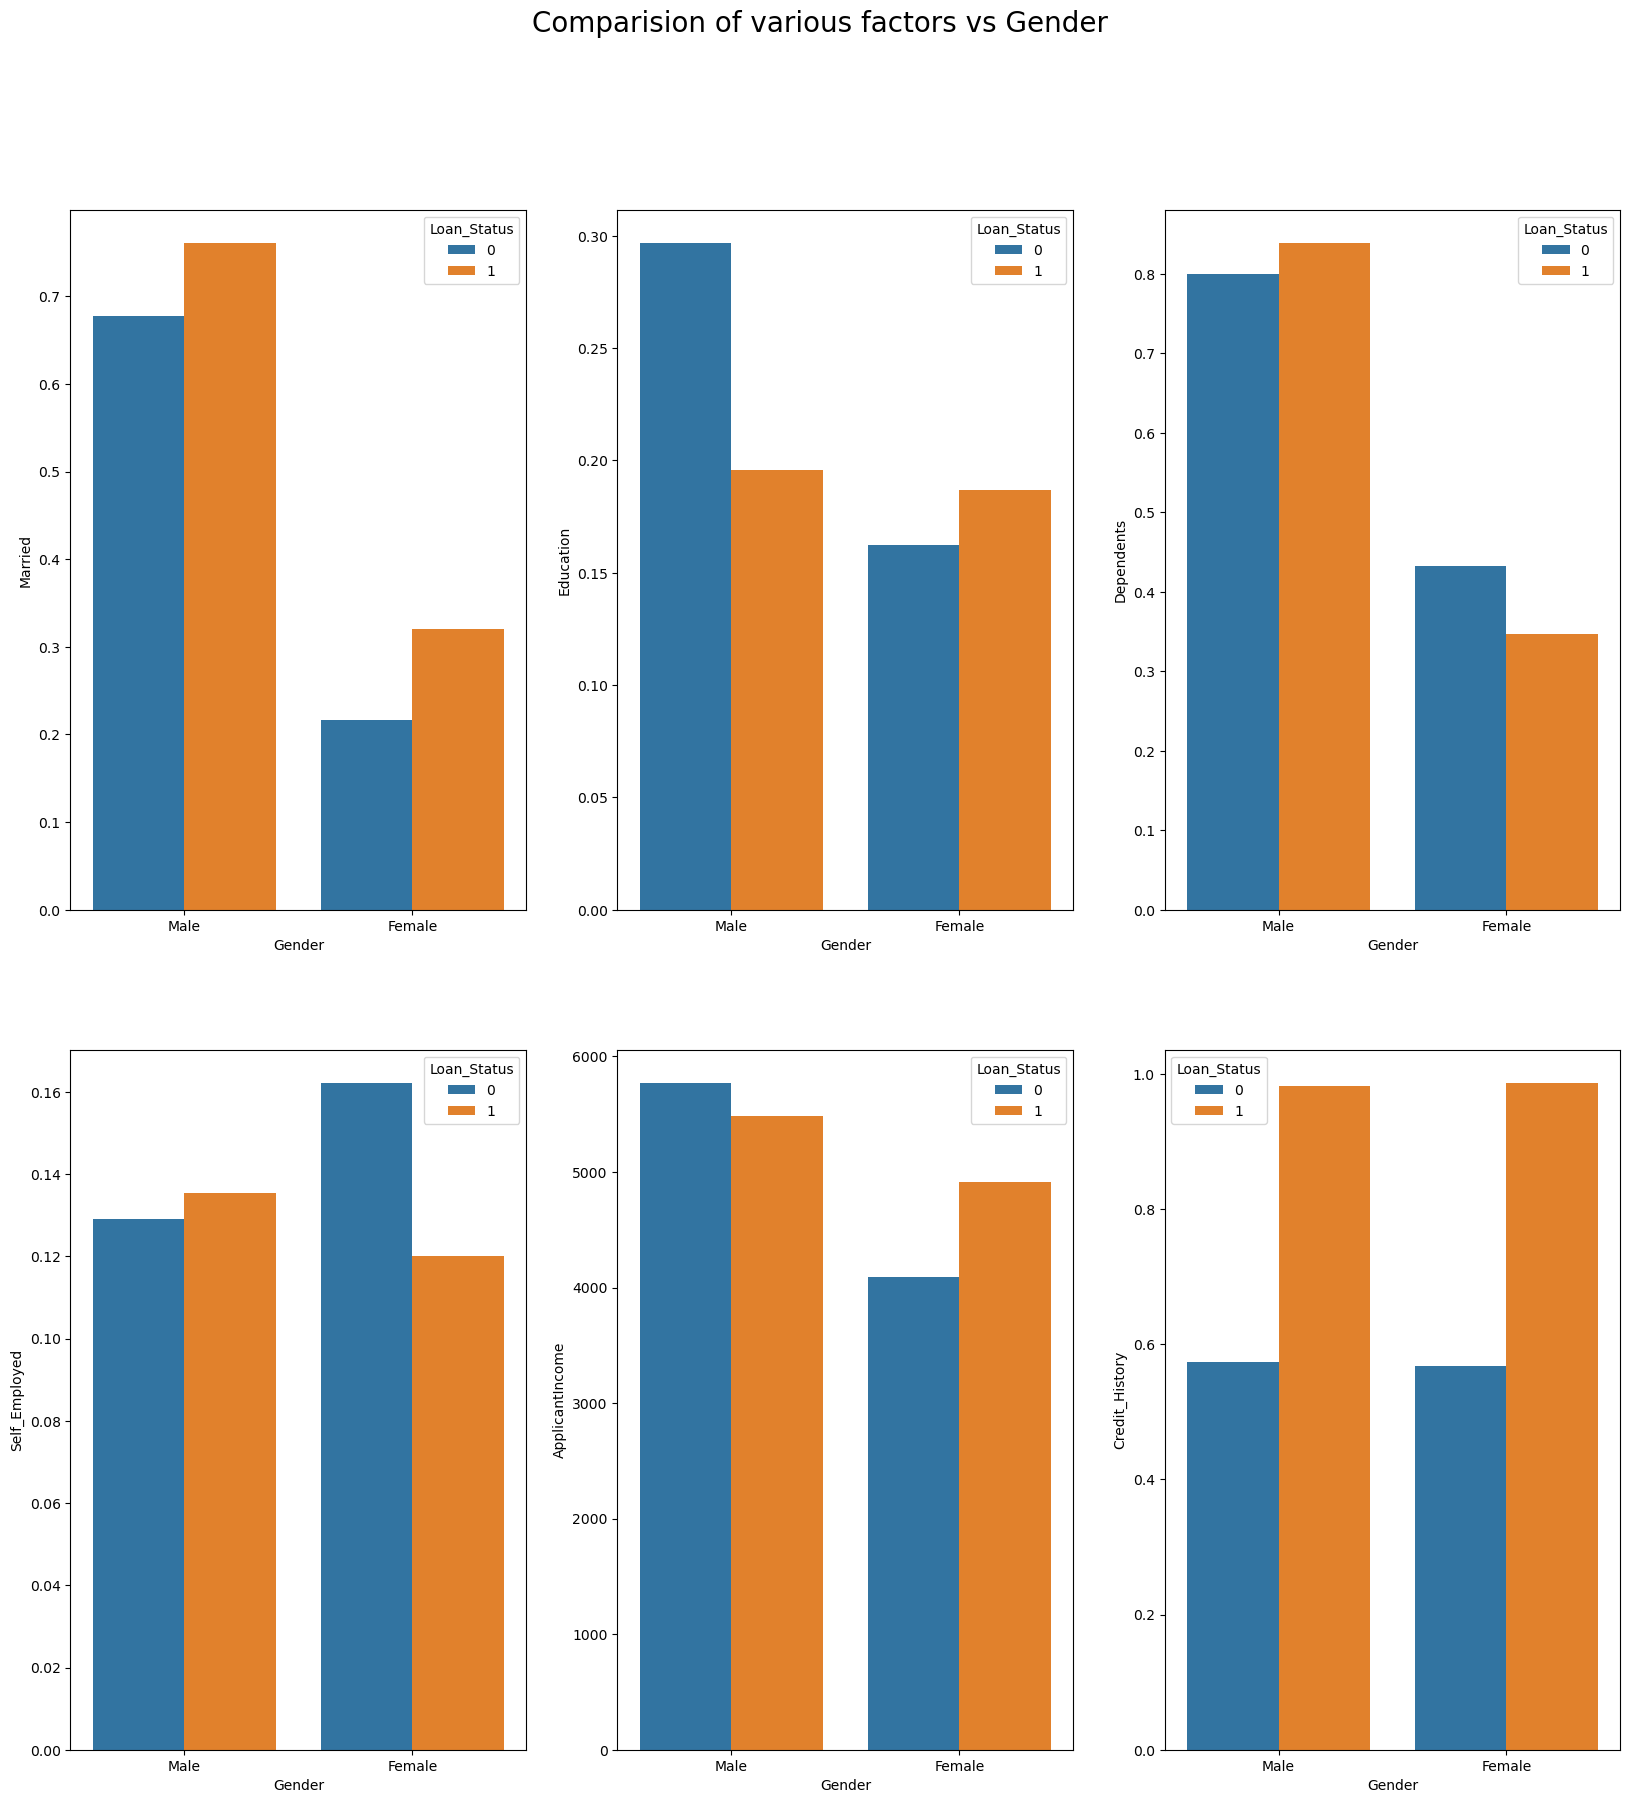

In [173]:
#Comparison of Gender with other Factors
fig,ax = plt.subplots(2,3, figsize=(20,20))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df1['Married'],hue = df1['Loan_Status'], ax = ax[0,0],ci=None);  
sns.barplot(df['Gender'],df1['Education'],hue = df1['Loan_Status'], ax = ax[0,1],ci=None);
sns.barplot(df['Gender'],df1['Dependents'],hue = df1['Loan_Status'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df1['Self_Employed'],hue = df1['Loan_Status'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df1['ApplicantIncome'],hue = df1['Loan_Status'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df1['Credit_History'],hue = df1['Loan_Status'], ax = ax[1,2],ci=None); 
plt.show()

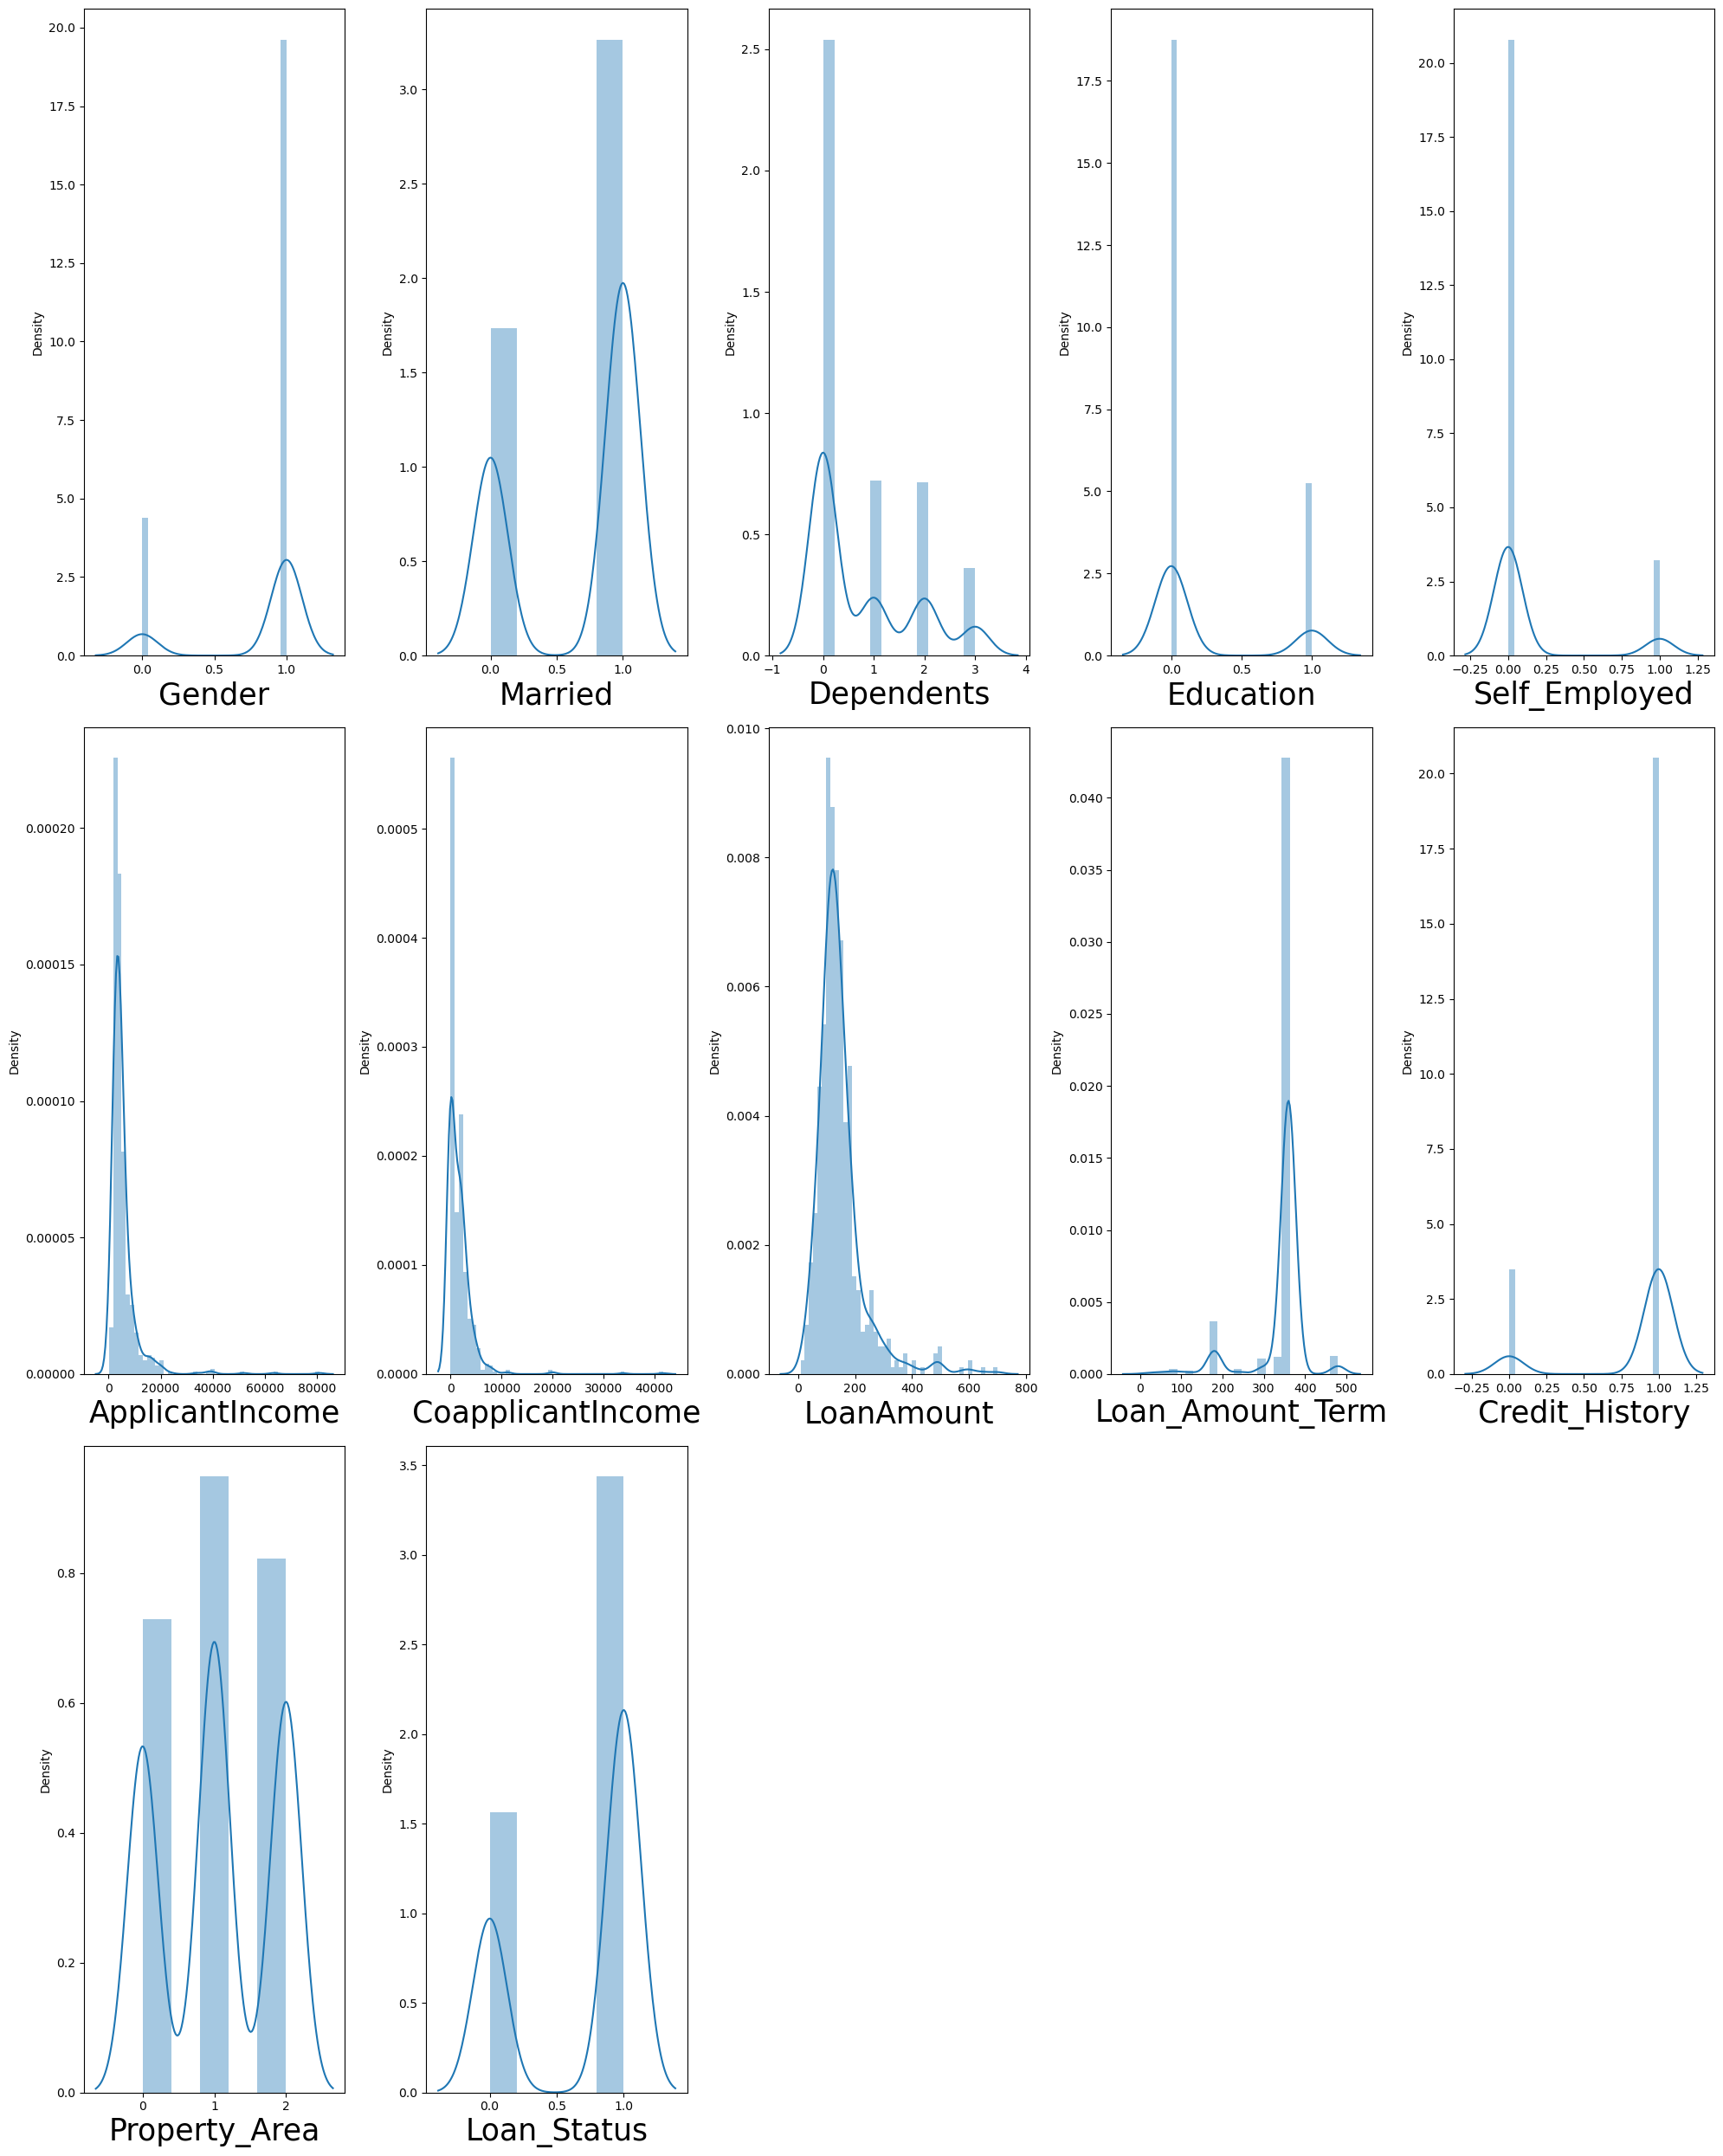

In [174]:
#Checking Data Distribution

plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

### There is some skewness present in continuous data so we will treat them further.

<AxesSubplot:xlabel='ApplicantIncome'>

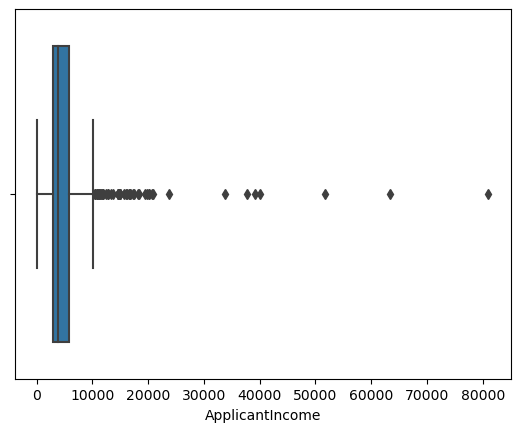

In [175]:
#Checking Outliers using Boxplot in continuous data

sns.boxplot(df1.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

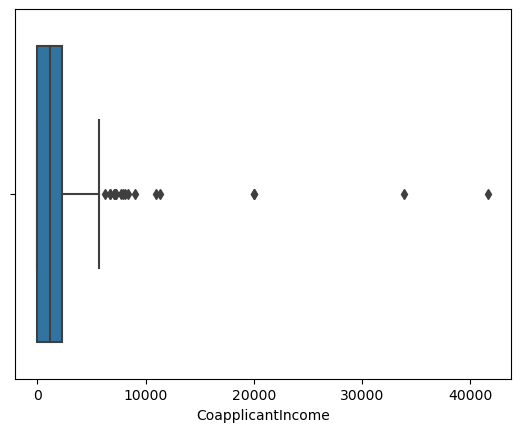

In [176]:
sns.boxplot(df1.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount'>

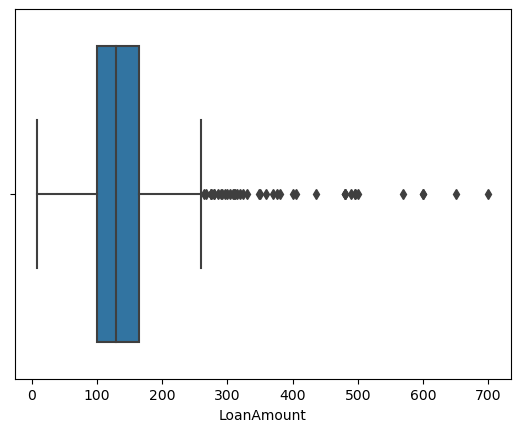

In [177]:
sns.boxplot(df1.LoanAmount)

In [178]:
#Hence treating Outliers using Quantile Method

q = df1['ApplicantIncome'].quantile(0.98)
data_cleaned = df1[df1['ApplicantIncome']<q]
q = data_cleaned['CoapplicantIncome'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['CoapplicantIncome']<q]
q = data_cleaned['LoanAmount'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['LoanAmount']<q]

<AxesSubplot:>

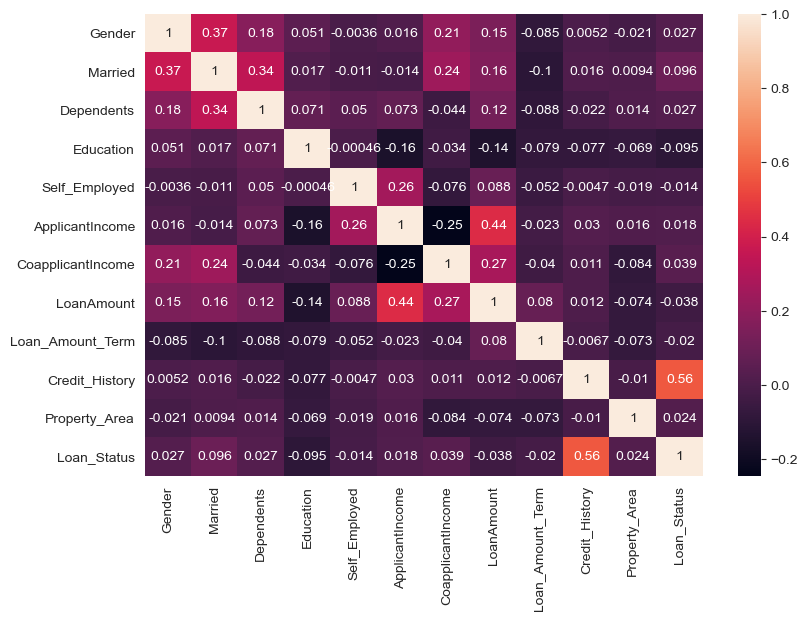

In [179]:
#Heatmap and Correlation

sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = data_cleaned.corr()
sns.heatmap(corr, annot=True)

In [180]:
#Checking Skewness in continuous columns :
data_cleaned.skew()

Gender              -1.621816
Married             -0.628217
Dependents           1.043356
Education            1.284872
Self_Employed        2.244210
ApplicantIncome      2.114755
CoapplicantIncome    1.267927
LoanAmount           0.839046
Loan_Amount_Term    -2.418738
Credit_History      -2.029400
Property_Area       -0.069828
Loan_Status         -0.836162
dtype: float64

In [181]:
#Treating Skewness
skew_var=['ApplicantIncome','CoapplicantIncome']


In [182]:
np.log(data_cleaned[skew_var]+1).skew()

ApplicantIncome     -0.244008
CoapplicantIncome   -0.197510
dtype: float64

In [183]:
np.sqrt(data_cleaned[skew_var]).skew()

ApplicantIncome      1.186910
CoapplicantIncome    0.204762
dtype: float64

In [184]:
data_cleaned[skew_var]=np.sqrt(data_cleaned[skew_var])

In [191]:
#Scaling Data

X=data_cleaned.drop(columns=['Loan_Status'],axis=1)
y=data_cleaned['Loan_Status']

scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)




In [192]:
#Splitting Data into Training and testing :

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.28,random_state=45)

In [193]:
#Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

In [194]:
rslt=[]

lr = LogisticRegression(C=10, fit_intercept=True, max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8114558472553699
TESTING SCORE :  0.8404907975460123
ACCURACY : 0.8404907975460123
*****************************
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.90       112

    accuracy                           0.84       163
   macro avg       0.91      0.75      0.78       163
weighted avg       0.87      0.84      0.82       163



In [195]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.8343558282208589
ACCURACY : 0.8343558282208589
*****************************
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        51
           1       0.83      0.95      0.89       112

    accuracy                           0.83       163
   macro avg       0.83      0.77      0.79       163
weighted avg       0.83      0.83      0.83       163



In [196]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.7914110429447853
ACCURACY : 0.7914110429447853
*****************************
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        51
           1       0.83      0.88      0.85       112

    accuracy                           0.79       163
   macro avg       0.76      0.74      0.75       163
weighted avg       0.79      0.79      0.79       163



In [197]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9236276849642004
TESTING SCORE :  0.803680981595092
ACCURACY : 0.803680981595092
*****************************
              precision    recall  f1-score   support

           0       0.81      0.49      0.61        51
           1       0.80      0.95      0.87       112

    accuracy                           0.80       163
   macro avg       0.80      0.72      0.74       163
weighted avg       0.80      0.80      0.79       163



In [198]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8090692124105012
TESTING SCORE :  0.8159509202453987
ACCURACY : 0.8159509202453987
*****************************
              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.81      0.96      0.88       112

    accuracy                           0.82       163
   macro avg       0.83      0.73      0.75       163
weighted avg       0.82      0.82      0.80       163



In [199]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8138424821002387
TESTING SCORE :  0.8404907975460123
ACCURACY : 0.8404907975460123
*****************************
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.90       112

    accuracy                           0.84       163
   macro avg       0.91      0.75      0.78       163
weighted avg       0.87      0.84      0.82       163



In [200]:
result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.840491
1,Random Forest,0.834356
2,Decision Tree,0.791411
3,Gradient Boosting,0.803681
4,KNN,0.815951
5,SVC,0.840491


In [201]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.799486,0.015916
Random Forest,0.787530,0.018575
Decision Tree,0.704025,0.017380
Gradientboost,0.792292,0.024024
KNN,0.787581,0.009074
SVC,0.806629,0.016145


In [202]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [203]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.7450980392156863
ROC_AUC_SCORE_RANDOM_FOREST : 0.7673319327731092
ROC_AUC_SCORE_DECISION_TREE : 0.741421568627451
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.718312324929972
ROC_AUC_SCORE_KNN : 0.7272408963585435
ROC_AUC_SCORE_SVC : 0.7450980392156863


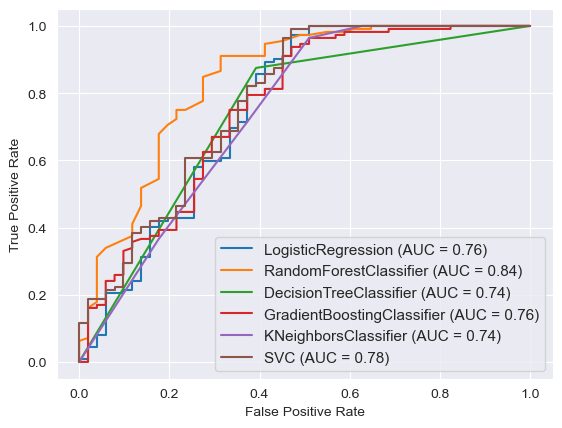

In [204]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## According to Accuracy Score and CV mean SVC is our Best fitted Model.But, as we move on to ROC-AUC curve, it shows that Random Forest is best model to predict. 

##### HYPERPARAMETER TUNING IN RANDOM FOREST USING GRID SEARCH CV

In [206]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [208]:
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [218]:
param = {
    'bootstrap':[True],
    'n_estimators':(100,200,300),
    'n_jobs':[-1],
}

In [219]:
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': (100, 200, 300),
                         'n_jobs': [-1]})

In [220]:
best_param=grid.best_params_
best_param

{'bootstrap': True, 'n_estimators': 200, 'n_jobs': -1}

In [221]:
rfc_tuned=RandomForestClassifier(n_estimators=200,max_depth=2,n_jobs=-1)
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1)

In [222]:
y_pred_rfc = rfc_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rfc_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_rfc))

TRAINING SCORE :  0.8114558472553699
TESTING SCORE :  0.8404907975460123
ACCURACY : 0.8404907975460123
*****************************
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.90       112

    accuracy                           0.84       163
   macro avg       0.91      0.75      0.78       163
weighted avg       0.87      0.84      0.82       163



 1 = YES 
 0 = NO 


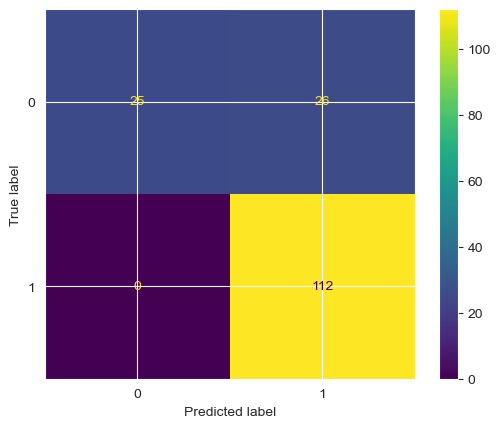

In [236]:
plot_confusion_matrix(rfc_tuned,x_test,y_test)

print(" 1 = YES ")
print(" 0 = NO ")

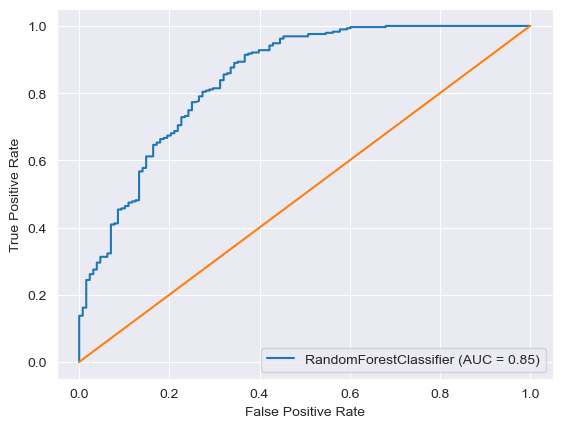

In [228]:
plot_roc_curve(rfc_tuned,x_train,y_train)
plt.plot(y_test,y_test)
plt.show()

In [238]:
#Model Saving

import joblib
joblib.dump(rfc_tuned,'Loan_Application.pkl')

['Loan_Application.pkl']